In [1]:
import numpy as np
import pandas as pd 
import warnings
from skimage.metrics import structural_similarity,normalized_root_mse
import cv2
warnings.filterwarnings('ignore')
pd.options.plotting.backend = "plotly"
from PIL import Image
from matplotlib import pyplot as plt

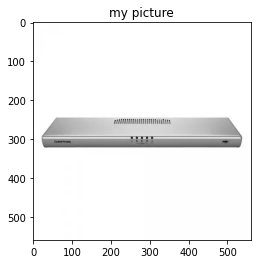

In [4]:
pil_image = Image.open('white.jpg').convert('RGB') 
# Convert RGB to BGR 
opencvImage = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

plt.imshow(opencvImage)
plt.title('my picture')
plt.show()

## Image Similarity Score

In [8]:
def rgb_similarity(img_a,img_b):
    img_a = Image.open(img_a)
    img_b  = Image.open(img_b)
    img_a = img_a.resize((500, 500))
    img_b = img_b.resize((500, 500))
    img1 = img_a.getcolors(maxcolors=img_a.size[0]*img_a.size[1])
    img2 = img_b.getcolors(maxcolors=img_b.size[0]*img_b.size[1])
    img1= dict(map(lambda x: (x[1],x[0]),img1))
    img2 = dict(map(lambda x: (x[1],x[0]),img2))
    results = []
    anchor_list = list(set(list(img1.keys()) + list(img2.keys())))
    for color in anchor_list:
        if color in img1.keys() and color in img2.keys():
            colorpixels1 = img1[color]/(500*500)
            colorpixels2 = img2[color]/(500*500)
            delta = abs(colorpixels1-colorpixels2)/(colorpixels1+colorpixels2)
            results.append(delta)
        else:
            results.append(1) 
    return 1 - np.mean(results)

def gray_scale_metrics(img_a,img_b):
    try:
        imageA = cv2.imread(img_a)
        imageB = cv2.imread(img_b)
        grayA = cv2.resize(cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY),(500,500))
        grayB = cv2.resize(cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY),(500,500))  
    except:
        grayA = cv2.resize(cv2.cvtColor(np.array(Image.open(img_a)), cv2.COLOR_BGR2GRAY),(500,500))
        grayB = cv2.resize(cv2.cvtColor(np.array(Image.open(img_b)), cv2.COLOR_BGR2GRAY),(500,500))
    (score, diff) = structural_similarity(grayA, grayB, full=True)
    return score,1-normalized_root_mse(grayA, grayB)


def image_similarity(img_a,img_b):
    a = rgb_similarity(img_a,img_b)
    b,c = gray_scale_metrics(img_a,img_b)
    print(a,b,c)
    return (a+0.7*b+0.3*c)/2



In [9]:
import requests
from io import BytesIO
def get_image_url(url:str):
    image_data = requests.get(url)
    img = BytesIO(image_data.content)
    return img

In [3]:
image_similarity('white.jpg','black.jpg')

0.13460546590827216 0.8709185993321812 0.78149663065624


0.48934873731883544

In [11]:
image_similarity('fita_1.jpeg','fita_2.jpeg')

0.02793572671100386 0.6889013747644691 0.7250113614622925


0.36383504874241